<img src="https://www.anped.org.br/sites/default/files/images/ufcg-lateral.png" width="780" height="240" align="center"/>

## Centro de Engenharia Elétrica e Informática
## Departamento de Engenharia Elétrica
## Disciplina: Int. ao Processamento de Imagem Digital e Visão Computacional
## Professora: Luciana Veloso
## Aluno(a):

# Experimento 05: Segmentação - Pt. 2

In [2]:
import os                            # Operational System para manipulação de arquivos.
import cv2                           # OpenCV para manipulação de imagens.
import numpy as np                   # Numpy para manipulação de matrizes e arrays.
import matplotlib.pyplot as plt      # Pyplot para plotagem de gráficos e imagens.

## Funções Auxiliares

## 1. Transformada de Hough

A biblioteca OpenCV disponibiliza funções para a aplicação da Transformada de Hough, viabilizando a identificação de retas e círculos:

1. Detecção de Linhas:  
    * **lines = cv2.HoughLines(src_img, $\rho_{res}$, $\theta_{res}$, threshold)**
    * src_img é a imagem de entrada e deve ser uma imagem binária;
    * $\rho_{res}$ controla a sensibilidade da variável $\rho$, em unidades;
    * $\theta_{res}$ controla a sensibilidade da variável $\theta$, em radianos;
    * threshold é o limiar do acumulador para que uma linha seja considerada válida;
    * lines é um array que armazena as linhas;
        * A variável tem dimensões (L, 1, 2), sendo L o número de linhas detectadas
        * Cada linha tem dimensões (1, 2) -> [$\rho$, $\theta$]
        * A i-ésima linha é acessada por linha = lines[ i ]
2. Detecção de Círculos:
    * **circles = cv2.HoughCircles(src_img, cv2.HOUGH_GRADIENT, dp, dist, param1, param2, minRadius=0, maxRadius=0)**
    * src_img é a imagem de entrada;
    * cv2.HOUGH_GRADIENT é um flag que determina o método a ser utilizado pelo algoritmo;
    * dp controla a resolução da matriz de acumuladores;
    * dist controla a distância mínima entre círculos para suprimir múltiplas detecção de um mesmo objeto;
    * param1 representa o limiar superior de um detector de Canny aplicado internamente à função, o limiar inferior é escolhido como param1/2;
    * param2 é uma variável análoga ao threshold de cv2.HoughLines e controla o limiar do acumulador para os círculos;
    * minRadius e maxRadius controlam os valores mínimo e máximo do raio dos círculos detectados. São ignorados se deixados no valor default 0.
    * circles é um array que armazena os círculos;
        * A variável tem dimensões (C, 3), sendo C o número de círculos detectados
        * Cada círculo de raio r e centrado em (x1, y1) tem dimensões (3) -> [x1, y1, r]

As funções a seguir podem ser utilizadas para desenhar linhas e círculos detectados:      

* **cv2.line(dst_img, (x1,y1), (x2,y2), color, width)**
* **cv2.circle(dst_img, (cx, cy), r, color, width)**
    * dst_img é a imagem de saída onde o desenho será feito;
    * (x1, y1) e (x2, y2) representam pontos do início/fim da linha desenhada;
    * (cx, cy) e r representam as coordenadas do centro do círculo e o raio, respectivamente;
    * color é uma tupla rgb (vermelho, verde, azul) que indica a cor da linha/circulo desenhado;
    * width indica a largura das linhas. Pode ser -1 no caso do circulo, indicando que a forma deve ser preenchida;

**a. O código abaixo realiza a detecção de linhas da imagem “Fig1034(a)(marion_airport).tif” utilizando a transformada de Hough. O que representam os pontos (x0, y0) marcados em ciano?**

Text(0.5, 1.0, 'Detecção de Linhas')

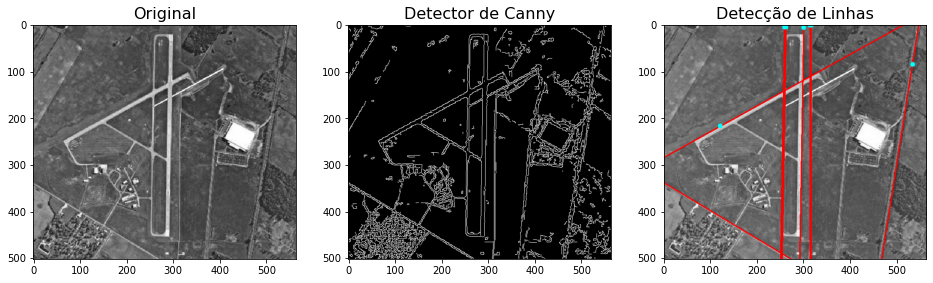

In [7]:
# Lê imagem e converte para escala de cinza
rgb_img = cv2.imread( os.path.join(".", "images", "Fig1034(a)(marion_airport).tif") )[:, :, ::-1]
src_img = cv2.cvtColor( rgb_img, cv2.COLOR_RGB2GRAY )

# Realiza detecção de bordas
canny_output = cv2.Canny(src_img, 100, 200, L2gradient = True )

# Realiza detecção de linhas
lines = cv2.HoughLines(canny_output,  1 ,  1 * np.pi / 180 , 200)

# Desenha as linhas em uma cópia de rgb_img
dst_img = rgb_img.copy()

for line in lines:
    rho   = line[0][0]
    theta = line[0][1]
    
    # Linhas
    x1 = int(rho * np.cos(theta) - 1000 * np.sin(theta))
    y1 = int(rho * np.sin(theta) + 1000 * np.cos(theta))
    x2 = int(rho * np.cos(theta) + 1000 * np.sin(theta))
    y2 = int(rho * np.sin(theta) - 1000 * np.cos(theta))
    cv2.line(dst_img, (x1,y1), (x2,y2), (255, 0, 0), 2)

    # Pontos
    x0 = int(rho * np.cos(theta))
    y0 = int(rho * np.sin(theta))
    cv2.circle(dst_img, (x0, y0), 5, (0, 255, 255), -1)

# Plots
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(16, 24))
    
# Imagem Original
axs[0].imshow(src_img, cmap="gray")
axs[0].set_title("Original", fontsize = 16)

# Filtragem
axs[1].imshow(canny_output, vmin = 0, vmax = 255, cmap="gray")
axs[1].set_title("Detector de Canny", fontsize = 16)

# Filtragem
axs[2].imshow(dst_img, vmin = 0, vmax = 255)
axs[2].set_title("Detecção de Linhas", fontsize = 16)

**b. Modifique o código acima para que sejam detectadas apenas as linhas referentes às pistas de pouso do aeroporto. Observe que o parâmetro $\theta$ em lines é dado em radianos.**

Linhas encontradas: 8 linhas
angle:  0.0
angle:  0.0
angle:  0.9999999922536332
angle:  0.9999999922536332
angle:  9.000000250447817
angle:  120.99999767530745
angle:  0.9999999922536332
angle:  61.000002835844505


Text(0.5, 1.0, 'Detecção de Linhas')

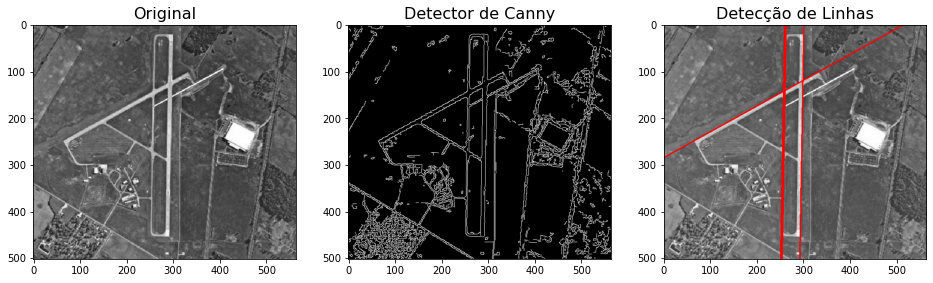

In [43]:
# Lê imagem e converte para escala de cinza
rgb_img = cv2.imread( os.path.join(".", "images", "Fig1034(a)(marion_airport).tif") )[:, :, ::-1]
src_img = cv2.cvtColor( rgb_img, cv2.COLOR_RGB2GRAY )

# Realiza detecção de bordas
canny_output = cv2.Canny(src_img, 100, 200, L2gradient = True )

# Realiza detecção de linhas
lines = cv2.HoughLines(canny_output,  1 ,  1 * np.pi / 180 , 200)

# Desenha as linhas em uma cópia de rgb_img
dst_img = rgb_img.copy()

print('Linhas encontradas:', lines.shape[0], 'linhas')

# percorre todas as linhas encontradas pelo filtro de canny
for i in lines:
    angle = i[0][1] * 180 / np.pi # rad p/ graus
    print('angle: ', angle)
    
        # Código reaproveitado de Leo
    rho   = i[0][0]
    theta = i[0][1]
    x1 = int(rho * np.cos(theta) - 1000 * np.sin(theta))
    y1 = int(rho * np.sin(theta) + 1000 * np.cos(theta))
    x2 = int(rho * np.cos(theta) + 1000 * np.sin(theta))
    y2 = int(rho * np.sin(theta) - 1000 * np.cos(theta))
    
    if (int(angle) == 0 or int(angle) == 61) and int(rho) < 310: #Percebe-se que as linhas desejadas atendem certas condições
        cv2.line(dst_img, (x1,y1), (x2,y2), (255, 0, 0), 2)

# Plots
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(16, 24))
    
# Imagem Original
axs[0].imshow(src_img, cmap="gray")
axs[0].set_title("Original", fontsize = 16)

# Filtragem
axs[1].imshow(canny_output, vmin = 0, vmax = 255, cmap="gray")
axs[1].set_title("Detector de Canny", fontsize = 16)

# Filtragem
axs[2].imshow(dst_img, vmin = 0, vmax = 255)
axs[2].set_title("Detecção de Linhas", fontsize = 16)

**c. O código abaixo utiliza a transformada de Hough para circular todos os planetas em um desenho do nosso Sistema Solar. Modifique os parâmetros da função cv2.HoughCircles e tente circular os planetas individualmente. Comente os resultados observados.**

<font color='green'>

# Resposta
Variando o minradius e o maxradius consegue-se escolher planetas individualmente por meio da função Hough.
    
<font>

Text(0.5, 1.0, 'Detecção de Círculos')

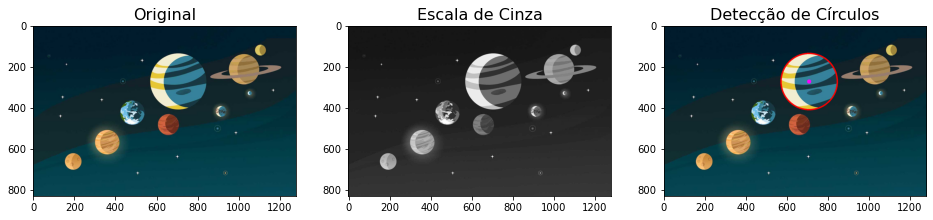

In [50]:
def draw_circles(src_img, circles_array, color = (255, 0, 0), width = 1):
    """Desenha círculos detectadas pela transformada de Hough.
    Args:
        src_img: imagem de entrada;
        lines_array: array com as linhas detectadas;
        color: tupla rgb que indica a cor das linhas desenhadas;
        width: largura das linhas desenhadas;

    Returns:
        dst_img: Cópia de src_img com linhas desenhadas;
     """
        
    dst_img = src_img.copy()
    circles_array = np.uint16(np.around(circles_array))
    for circle in circles_array[0]:
        x1, y1, r = circle
        # Circunferência
        cv2.circle(dst_img, (x1, y1), r, color, width)
        # Centro
        cv2.circle(dst_img, (x1, y1), 10, (255, 0, 255), -1)
        
    return dst_img

# Lê imagem e converte para escala de cinza
bgr_img = cv2.imread( os.path.join(".", "images", "planets.jpg") )[:, :, ::-1]
src_img = cv2.cvtColor( bgr_img, cv2.COLOR_RGB2GRAY )

# Realiza detecção de linhas
circles = cv2.HoughCircles(src_img,cv2.HOUGH_GRADIENT, 1, 100, param1=100, param2=50, minRadius=100, maxRadius=150)
dst_img = draw_circles(bgr_img, circles, color = (255, 0, 0), width = 5)

# Plots
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(16, 24))
    
# Imagem Original
axs[0].imshow(bgr_img, vmin = 0, vmax = 255, cmap="gray")
axs[0].set_title("Original", fontsize = 16)

# Filtragem
axs[1].imshow(src_img, vmin = 0, vmax = 255, cmap="gray")
axs[1].set_title("Escala de Cinza", fontsize = 16)

# Filtragem
axs[2].imshow(dst_img, vmin = 0, vmax = 255)
axs[2].set_title("Detecção de Círculos", fontsize = 16)

## 2. Segmentação por Limiarização

A biblioteca OpenCV disponibiliza funções para a limiarização de imagens:

1. Limiarização com limiar global:  
    * **limiar, th1 = cv2.threshold( src_img, limiar, vmax, cv2.THRESH_BINARY )**
2. Limiarização com limiar global escolhido automaticamente:
    * **limiar, th1 = cv2.threshold( src_img, 0, vmax, cv2.THRESH_BINARY + cv2.THRESH_OTSU )**
3. Limiarização com limiar local escolhido automaticamente:
    * **th1 = cv2.adaptiveThreshold(src_img, vmax, flag, cv2.THRESH_BINARY, block_size, C)**
    
As variáveis listadas correspondem a:
* src_img é a imagem de entrada;
* limiar é o valor global de limiarização;
* vmax é o valor para o qual os pixels acima do limiar são setados;
* cv2.THRESH_BINARY é um flag que indica o tipo de limiarização a ser executado. Outras opções estão disponíveis;
* block_size define o tamanho da janela utilizada na limiarização adaptativa
* C é uma constante que controla a definição do limiar local
* flag define a forma como o limiar local é definido
    * Se for cv2.ADAPTIVE_THRESH_MEAN_C o limiar local é definido como a média da vizinhança menos C
    * Se for cv2.ADAPTIVE_THRESH_GAUSSIAN_C o limiar local é definido como uma soma ponderada gaussiana da vizinhança menos C

**a. O código abaixo realiza a segmentação de um marca-passo a partir de uma imagem de raio-x. Analise o código e comente sobre os passos executados nesse processo.**

<font color='green'>
O código abaixo aplica diversas limiarizações na imagem afim de excluir os dados que não representam um marca passo, para melhor a binarização é utilizado dilatações e eroções para remover ruídos e melhor adpatar a mascara ao objeto de interesse
</font>

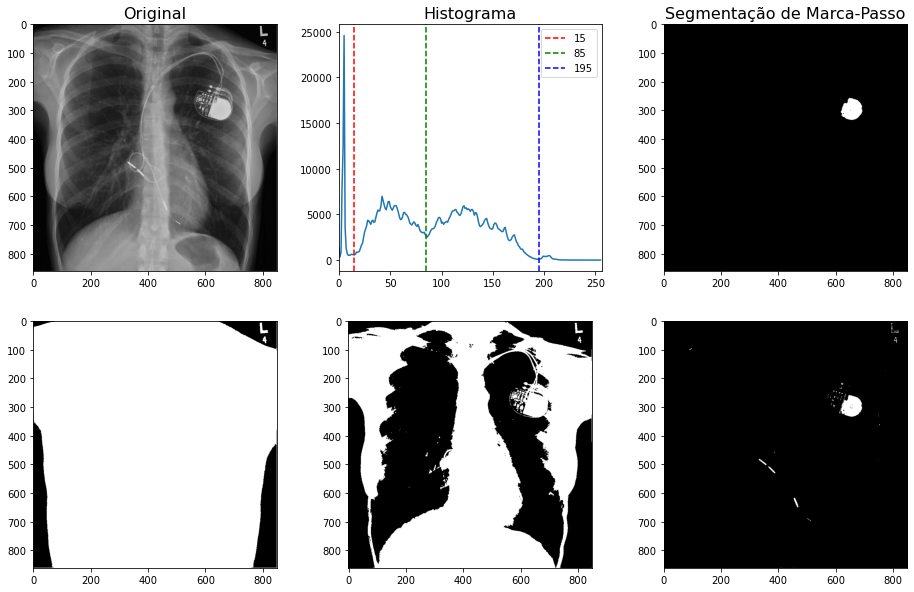

In [3]:
src_img = cv2.imread( os.path.join(".", "images", "pacemaker.png"), 0 )
hist = cv2.calcHist([src_img], [0], None, [256], [0,256])
    
_, th1 = cv2.threshold(src_img, 15, 255, cv2.THRESH_BINARY)
_, th2 = cv2.threshold(src_img, 85, 255, cv2.THRESH_BINARY)
_, th3 = cv2.threshold(src_img, 195, 255, cv2.THRESH_BINARY)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
th4 = cv2.erode(th3, kernel, iterations = 4)
th4 = cv2.dilate(th4, kernel, iterations = 5)

# Plots
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize=(16, 10))
    
# Imagem Original
axs[0][0].imshow(src_img, vmin = 0, vmax = 255, cmap="gray")
axs[0][0].set_title("Original", fontsize = 16)

# Histograma
axs[0][1].plot(hist)
axs[0][1].set_xlim([0,256])
axs[0][1].axvline(x=15, label="15", c="r", ls="--")
axs[0][1].axvline(x=85, label="85", c="g", ls="--")
axs[0][1].axvline(x=195, label="195", c="b", ls="--")
axs[0][1].set_title("Histograma", fontsize = 16)
axs[0][1].legend()

# Segmentação de Marca-Passo
axs[0][2].imshow(th4, vmin = 0, vmax = 255, cmap="gray")
axs[0][2].set_title("Segmentação de Marca-Passo", fontsize = 16)

axs[1][0].imshow(th1, vmin = 0, vmax = 255, cmap="gray")
axs[1][1].imshow(th2, vmin = 0, vmax = 255, cmap="gray")
axs[1][2].imshow(th3, vmin = 0, vmax = 255, cmap="gray")

**b. O código abaixo realiza a segmentação de uma imagem utilizando limiarização de Otsu e limiarização Adaptativa. Qual método foi mais bem sucedido? Por que esse método funcionou melhor que os outros?**

<font color='green'>
 A limiarização de Otsu é otimo pois mascarou bem o objeto de interesse, funcionou melhor pois ele não é sensível ao ruído da imagem
   
</font>

Text(0.5, 1.0, 'ADAPTIVE_THRESH_GAUSSIAN_C')

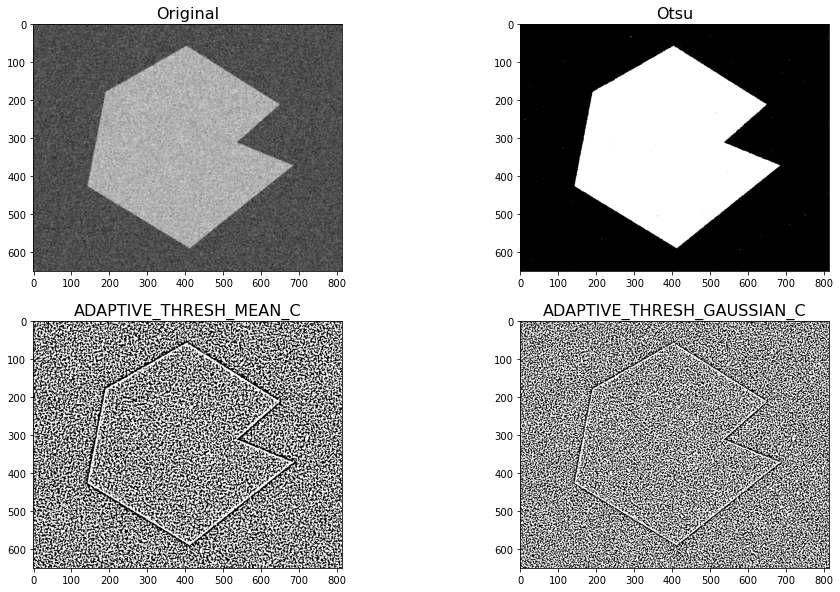

In [4]:
src_img = cv2.imread( os.path.join(".", "images", "Fig1036(c)(gaussian_noise_mean_0_std_50_added).tif"), 0 )
src_img = cv2.GaussianBlur(src_img,(5,5),0)
hist = cv2.calcHist([src_img], [0], None, [256], [0,256])
    
limiar, th1 = cv2.threshold( src_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU )
th2 = cv2.adaptiveThreshold(src_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(src_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Plots
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(16, 10))
    
# Imagem Original
axs[0][0].imshow(src_img, vmin = 0, vmax = 255, cmap="gray")
axs[0][0].set_title("Original", fontsize = 16)

axs[0][1].imshow(th1, vmin = 0, vmax = 255, cmap="gray")
axs[0][1].set_title("Otsu", fontsize = 16)

axs[1][0].imshow(th2, vmin = 0, vmax = 255, cmap="gray")
axs[1][0].set_title("ADAPTIVE_THRESH_MEAN_C", fontsize = 16)

axs[1][1].imshow(th3, vmin = 0, vmax = 255, cmap="gray")
axs[1][1].set_title("ADAPTIVE_THRESH_GAUSSIAN_C", fontsize = 16)

**c. O código abaixo realiza a segmentação de uma imagem utilizando limiarização de Otsu e limiarização Adaptativa. Qual método foi mais bem sucedido? Por que esse método funcionou melhor que os outros?**

<font color='green'>
O método de limiarização adaptativa é otimo pois ele é sensível aos ruído, e conseguiu mascarar bem os textos na imagem
</font>

Text(0.5, 1.0, 'ADAPTIVE_THRESH_GAUSSIAN_C')

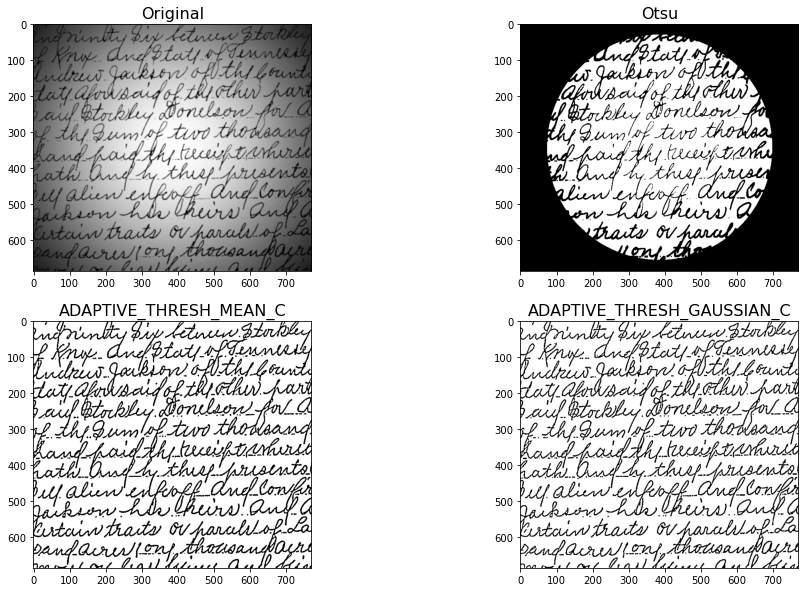

In [6]:
src_img = cv2.imread( os.path.join(".", "images", "Fig1049(a)(spot_shaded_text_image).tif"), 0 )
src_img = cv2.GaussianBlur(src_img,(5,5),0)
hist = cv2.calcHist([src_img], [0], None, [256], [0,256])
    
limiar, th1 = cv2.threshold( src_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU )
th2 = cv2.adaptiveThreshold(src_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(src_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Plots
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(16, 10))
    
# Imagem Original
axs[0][0].imshow(src_img, vmin = 0, vmax = 255, cmap="gray")
axs[0][0].set_title("Original", fontsize = 16)

axs[0][1].imshow(th1, vmin = 0, vmax = 255, cmap="gray")
axs[0][1].set_title("Otsu", fontsize = 16)

axs[1][0].imshow(th2, vmin = 0, vmax = 255, cmap="gray")
axs[1][0].set_title("ADAPTIVE_THRESH_MEAN_C", fontsize = 16)

axs[1][1].imshow(th3, vmin = 0, vmax = 255, cmap="gray")
axs[1][1].set_title("ADAPTIVE_THRESH_GAUSSIAN_C", fontsize = 16)

**d. Qual a função do filtro gaussiano aplicado antes da limiarização? A sua retirada produz efeitos significativos nas imagens dos itens b e c? Experimente também em outras figuras da pasta de imagens e comente os resultados.**

## 3. Segmentação por Cor

Utilizando espaço de cores como HSV é possível segmentar imagens a partir das cores de objetos. Nesse contexto, a biblioteca OpenCV disponibiliza funções para a conversão de espaço de cores e para a filtragem das imagens coloridas:

1. Conversão RGB -> HSV:  
    * **hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)**
    * O canal H corresponde à tonalidade da cor e determina o ângulo no cilindro da figura abaixo. Varia de 0 a 180 sendo cada unidade correspondente a 2 graus no ângulo descrito;
    * O canal S corresponde à saturação e determina a pureza das cores, quanto menor o valor de S mais diluído em cinza é a tonalidade da cor, determina o raio no cilindro da figura abaixo. Varia de 0 a 255;
    * O canal V corresponde à intensidade luminosa (ou brilho) e determina a altura no cilindro da figura abaixo. O canal V pode ser pensado como a imagem em escala de cinza. Varia de 0 a 255;
2. Seleção de elementos intermediários:
    * **mask = cv2.inRange(src_img, lower_bound, higher_bound)**
    * src_img é a imagem de entrada;
    * lower_bound é um array que determina limiares inferiores;
    * higher_bound é um array que determina limiares superiores;
    * mask é uma imagem binária cujos pixels tem valor alto (255) se os respectivos valores de src_img estão entre os valores de lower_bound e higher_bound para todas as coordenadas;
    
Observações:

* Vermelho se localiza nos arredores de 0 graus.
* Amarelo se localiza nos arredores de 60 graus.
* Verde se localiza nos arredores de 120 graus.
* Ciano se localiza nos arredores de 180 graus.
* Azul se localiza nos arredores de 240 graus.
* Magenta se localiza nos arredores de 300 graus.
* Tons mais específicos podem ser localizados empiricamente.
* O valor no OpenCV é o nº de graus dividido por 2.

![caption](files/images/hsv.png)

**a. O código abaixo realiza a segmentação de uma maçã na imagem “apple.jpg” a partir da sua cor. Analise o código e comente os resultados produzidos.**
* O que acontece se a etapa de erosão for retirada? 
*E a etapa de dilatação?

<font color='green'> 

# Resposta
Quando a etapa de erosão é removida os tons de vermelho da pele são incluídos na mascara, caracterizando como ruído.

Como a maçã não é 100% vermelha, a etapa de dilatação serve para aumentar a amostragem em torno da maçã.
<font>
    
PS: acho roxo bonito, mas verde chama mais a atenção.

Text(0.5, 1.0, 'Combinação')

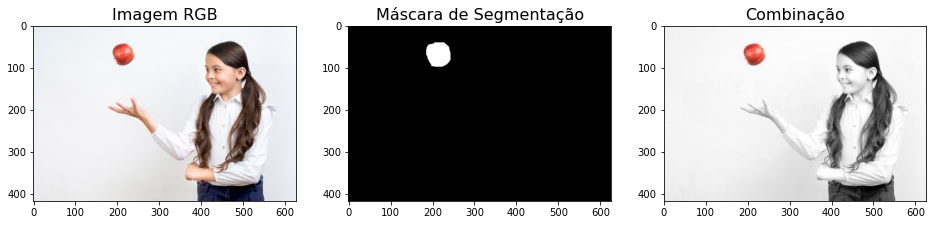

In [6]:
# Carrega a imagem e converte
rgb_img = cv2.imread( os.path.join(".", "images", "apple.jpg") )[:,:,::-1]
hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)

# Filtragem por cor
min_HUE =   0; max_HUE = 30
min_SAT = 145; max_SAT = 255
min_VAL = 135; max_VAL = 255
mask = cv2.inRange(hsv_img, (min_HUE, min_SAT, min_VAL), (max_HUE, max_SAT, max_VAL))
H, W = mask.shape

# Supressão de ruído
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
mask = cv2.erode(mask, kernel, iterations = 1)

# Preenchimento de buracos
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
mask = cv2.dilate(mask, kernel, iterations = 3)

# Aplicação de máscaras
color_img = cv2.bitwise_and(rgb_img, rgb_img, mask=mask)
gray_img = cv2.bitwise_and(hsv_img[:,:, 2], hsv_img[:,:, 2], mask=~mask)

# O reshape serve apenas pra poder somar as imagens
dst_img = gray_img.reshape( ( H, W, 1 ) ) + color_img

# Plots
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(16, 10))
    
# Imagem Original
axs[0].imshow(rgb_img, vmin = 0, vmax = 255, cmap="gray")
axs[0].set_title("Imagem RGB", fontsize = 16)

axs[1].imshow(mask, vmin = 0, vmax = 255, cmap="gray")
axs[1].set_title("Máscara de Segmentação", fontsize = 16)

axs[2].imshow(dst_img, vmin = 0, vmax = 255, cmap="gray")
axs[2].set_title("Combinação", fontsize = 16)

**b. Seria possível realizar um processo semelhante utilizando o espaço RGB?. Quais seriam as principais dificuldades de se utilizar esse espaço de cores?**

<font color='green'> 
    
# Resposta
    
É possível, entrentando seria extremamente díficil identificar a cor pela matiz.
Ex: Vermelho em rgb é rgb(255, 0, 0), porém um vermelho mais/menos saturado ou com mais/menos brilho por ser representado por rgb(200, 20, 20) os três parâmetros variam mas podem representar uma cor de mesma matiz
    
<font>

**c. Carregue a imagem "frutas.jpg" como uma imagem colorida e segmente os elementos pedidos.**
* Localize apenas as uvas. 
* Localize apenas os kiwis.
* Localize apenas os abacaxis.
* Localize as uvas, os morangos e os abacaxis.
* Localize os morangos e as framboesas.
* Nessa questão não é necessário utilizar morfologia matemática.

Text(0.5, 1.0, 'Combinação')

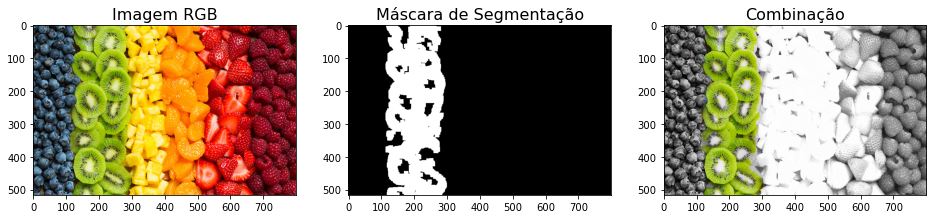

In [12]:
# Carrega a imagem e converte
rgb_img = cv2.imread( os.path.join(".", "images", "frutas.jpg") )[:,:,::-1]
hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)

# Filtragem por cor
min_HUE =   35; max_HUE = 50
min_SAT = 145; max_SAT = 255
min_VAL = 135; max_VAL = 255
mask = cv2.inRange(hsv_img, (min_HUE, min_SAT, min_VAL), (max_HUE, max_SAT, max_VAL))
H, W = mask.shape

# Supressão de ruído
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
mask = cv2.erode(mask, kernel, iterations = 1)

# Preenchimento de buracos
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
mask = cv2.dilate(mask, kernel, iterations = 3)

# Aplicação de máscaras
color_img = cv2.bitwise_and(rgb_img, rgb_img, mask=mask)
gray_img = cv2.bitwise_and(hsv_img[:,:, 2], hsv_img[:,:, 2], mask=~mask)

# O reshape serve apenas pra poder somar as imagens
dst_img = gray_img.reshape( ( H, W, 1 ) ) + color_img

# Plots
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(16, 10))
    
# Imagem Original
axs[0].imshow(rgb_img, vmin = 0, vmax = 255, cmap="gray")
axs[0].set_title("Imagem RGB", fontsize = 16)

axs[1].imshow(mask, vmin = 0, vmax = 255, cmap="gray")
axs[1].set_title("Máscara de Segmentação", fontsize = 16)

axs[2].imshow(dst_img, vmin = 0, vmax = 255, cmap="gray")
axs[2].set_title("Combinação", fontsize = 16)

Text(0.5, 1.0, 'Combinação')

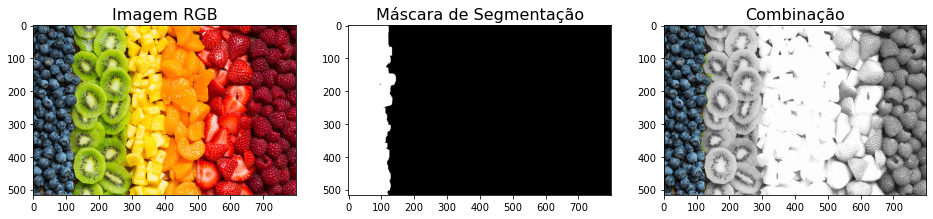

In [29]:
# Carrega a imagem e converte
rgb_img = cv2.imread( os.path.join(".", "images", "frutas.jpg") )[:,:,::-1]
hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)

# Filtragem por cor
min_HUE =   100; max_HUE = 150
min_SAT = 0; max_SAT = 255
min_VAL = 0; max_VAL = 255
mask = cv2.inRange(hsv_img, (min_HUE, min_SAT, min_VAL), (max_HUE, max_SAT, max_VAL))
H, W = mask.shape

# Supressão de ruído
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
mask = cv2.erode(mask, kernel, iterations = 1)

# Preenchimento de buracos
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
mask = cv2.dilate(mask, kernel, iterations = 3)

# Aplicação de máscaras
color_img = cv2.bitwise_and(rgb_img, rgb_img, mask=mask)
gray_img = cv2.bitwise_and(hsv_img[:,:, 2], hsv_img[:,:, 2], mask=~mask)

# O reshape serve apenas pra poder somar as imagens
dst_img = gray_img.reshape( ( H, W, 1 ) ) + color_img

# Plots
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(16, 10))
    
# Imagem Original
axs[0].imshow(rgb_img, vmin = 0, vmax = 255, cmap="gray")
axs[0].set_title("Imagem RGB", fontsize = 16)

axs[1].imshow(mask, vmin = 0, vmax = 255, cmap="gray")
axs[1].set_title("Máscara de Segmentação", fontsize = 16)

axs[2].imshow(dst_img, vmin = 0, vmax = 255, cmap="gray")
axs[2].set_title("Combinação", fontsize = 16)

Text(0.5, 1.0, 'Combinação')

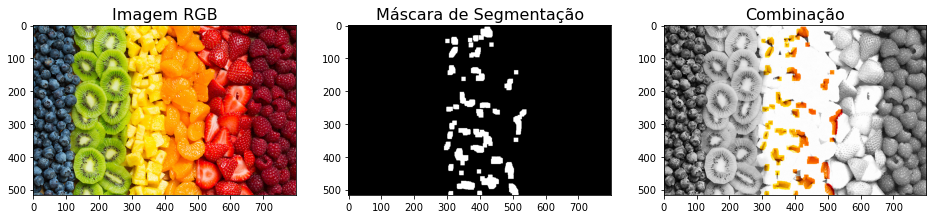

In [54]:
# Carrega a imagem e converte
rgb_img = cv2.imread( os.path.join(".", "images", "frutas.jpg") )[:,:,::-1]
hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)

# Filtragem por cor
min_HUE =   10; max_HUE = 20
min_SAT = 230; max_SAT = 255
min_VAL = 180; max_VAL = 245
mask = cv2.inRange(hsv_img, (min_HUE, min_SAT, min_VAL), (max_HUE, max_SAT, max_VAL))
H, W = mask.shape

# Supressão de ruído
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
mask = cv2.erode(mask, kernel, iterations = 1)

# Preenchimento de buracos
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
mask = cv2.dilate(mask, kernel, iterations = 3)

# Aplicação de máscaras
color_img = cv2.bitwise_and(rgb_img, rgb_img, mask=mask)
gray_img = cv2.bitwise_and(hsv_img[:,:, 2], hsv_img[:,:, 2], mask=~mask)

# O reshape serve apenas pra poder somar as imagens
dst_img = gray_img.reshape( ( H, W, 1 ) ) + color_img

# Plots
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(16, 10))
    
# Imagem Original
axs[0].imshow(rgb_img, vmin = 0, vmax = 255, cmap="gray")
axs[0].set_title("Imagem RGB", fontsize = 16)

axs[1].imshow(mask, vmin = 0, vmax = 255, cmap="gray")
axs[1].set_title("Máscara de Segmentação", fontsize = 16)

axs[2].imshow(dst_img, vmin = 0, vmax = 255, cmap="gray")
axs[2].set_title("Combinação", fontsize = 16)

Text(0.5, 1.0, 'Combinação')

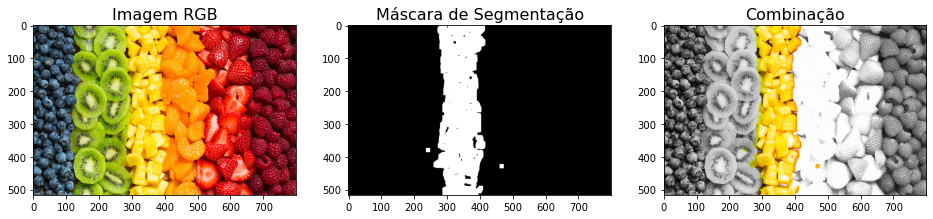

In [66]:
# Carrega a imagem e converte
rgb_img = cv2.imread( os.path.join(".", "images", "frutas.jpg") )[:,:,::-1]
hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)

# Filtragem por cor
min_HUE =   23; max_HUE = 30
min_SAT = 175; max_SAT = 255
min_VAL = 135; max_VAL = 255
mask = cv2.inRange(hsv_img, (min_HUE, min_SAT, min_VAL), (max_HUE, max_SAT, max_VAL))
H, W = mask.shape

# Supressão de ruído
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
mask = cv2.erode(mask, kernel, iterations = 1)

# Preenchimento de buracos
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
mask = cv2.dilate(mask, kernel, iterations = 3)

# Aplicação de máscaras
color_img = cv2.bitwise_and(rgb_img, rgb_img, mask=mask)
gray_img = cv2.bitwise_and(hsv_img[:,:, 2], hsv_img[:,:, 2], mask=~mask)

# O reshape serve apenas pra poder somar as imagens
dst_img = gray_img.reshape( ( H, W, 1 ) ) + color_img

# Plots
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(16, 10))
    
# Imagem Original
axs[0].imshow(rgb_img, vmin = 0, vmax = 255, cmap="gray")
axs[0].set_title("Imagem RGB", fontsize = 16)

axs[1].imshow(mask, vmin = 0, vmax = 255, cmap="gray")
axs[1].set_title("Máscara de Segmentação", fontsize = 16)

axs[2].imshow(dst_img, vmin = 0, vmax = 255, cmap="gray")
axs[2].set_title("Combinação", fontsize = 16)

Text(0.5, 1.0, 'Combinação')

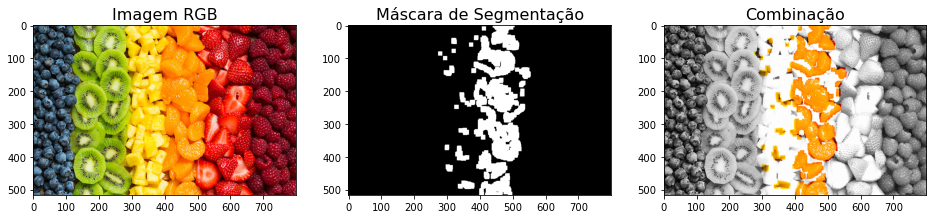

In [87]:
# Carrega a imagem e converte
rgb_img = cv2.imread( os.path.join(".", "images", "frutas.jpg") )[:,:,::-1]
hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)

# Filtragem por cor
min_HUE =   18; max_HUE = 19
min_SAT = 185; max_SAT = 255
min_VAL = 0; max_VAL = 255
mask = cv2.inRange(hsv_img, (min_HUE, min_SAT, min_VAL), (max_HUE, max_SAT, max_VAL))
H, W = mask.shape

# Supressão de ruído
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
mask = cv2.erode(mask, kernel, iterations = 1)

# Preenchimento de buracos
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
mask = cv2.dilate(mask, kernel, iterations = 3)

# Aplicação de máscaras
color_img = cv2.bitwise_and(rgb_img, rgb_img, mask=mask)
gray_img = cv2.bitwise_and(hsv_img[:,:, 2], hsv_img[:,:, 2], mask=~mask)

# O reshape serve apenas pra poder somar as imagens
dst_img = gray_img.reshape( ( H, W, 1 ) ) + color_img

# Plots
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(16, 10))
    
# Imagem Original
axs[0].imshow(rgb_img, vmin = 0, vmax = 255, cmap="gray")
axs[0].set_title("Imagem RGB", fontsize = 16)

axs[1].imshow(mask, vmin = 0, vmax = 255, cmap="gray")
axs[1].set_title("Máscara de Segmentação", fontsize = 16)

axs[2].imshow(dst_img, vmin = 0, vmax = 255, cmap="gray")
axs[2].set_title("Combinação", fontsize = 16)

Text(0.5, 1.0, 'Combinação')

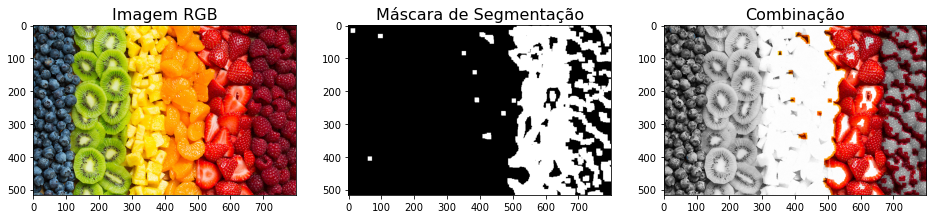

In [100]:
# Carrega a imagem e converte
rgb_img = cv2.imread( os.path.join(".", "images", "frutas.jpg") )[:,:,::-1]
hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)

# Filtragem por cor
min_HUE =   0; max_HUE = 5
min_SAT = 185; max_SAT = 255
min_VAL = 0; max_VAL = 255
mask = cv2.inRange(hsv_img, (min_HUE, min_SAT, min_VAL), (max_HUE, max_SAT, max_VAL))
H, W = mask.shape

# Supressão de ruído
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
mask = cv2.erode(mask, kernel, iterations = 1)

# Preenchimento de buracos
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
mask = cv2.dilate(mask, kernel, iterations = 3)

# Aplicação de máscaras
color_img = cv2.bitwise_and(rgb_img, rgb_img, mask=mask)
gray_img = cv2.bitwise_and(hsv_img[:,:, 2], hsv_img[:,:, 2], mask=~mask)

# O reshape serve apenas pra poder somar as imagens
dst_img = gray_img.reshape( ( H, W, 1 ) ) + color_img

# Plots
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(16, 10))
    
# Imagem Original
axs[0].imshow(rgb_img, vmin = 0, vmax = 255, cmap="gray")
axs[0].set_title("Imagem RGB", fontsize = 16)

axs[1].imshow(mask, vmin = 0, vmax = 255, cmap="gray")
axs[1].set_title("Máscara de Segmentação", fontsize = 16)

axs[2].imshow(dst_img, vmin = 0, vmax = 255, cmap="gray")
axs[2].set_title("Combinação", fontsize = 16)